In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

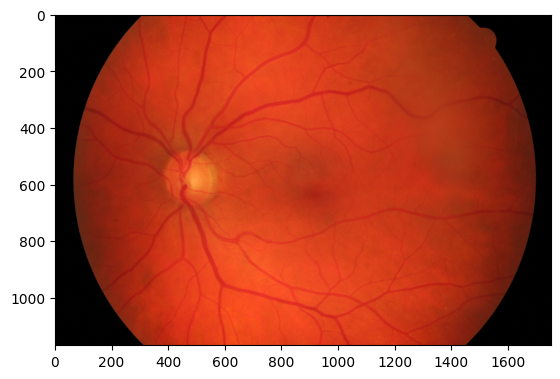

In [56]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
plt.imshow(hrf_res)

In [57]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [58]:
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

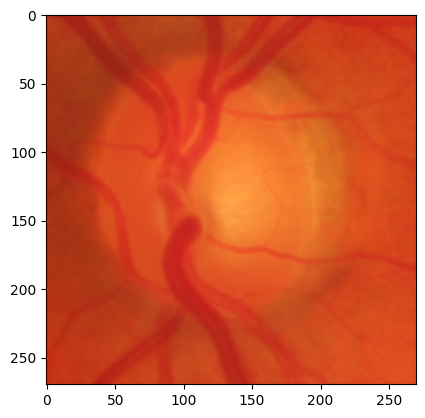

In [59]:
plt.imshow(roi)

In [60]:
grayroi = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2GRAY)
luvroi = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2LUV)
crcbroi = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2YCrCb)
yuvroi = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2YUV)

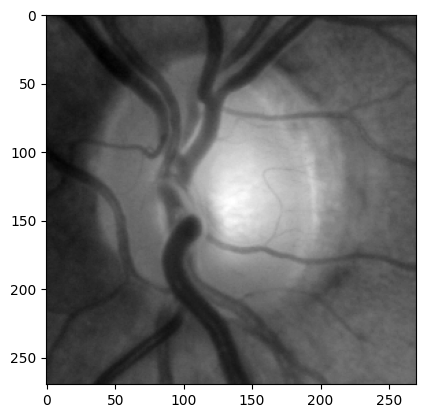

In [206]:
plt.imshow(grayroi, 'gray')

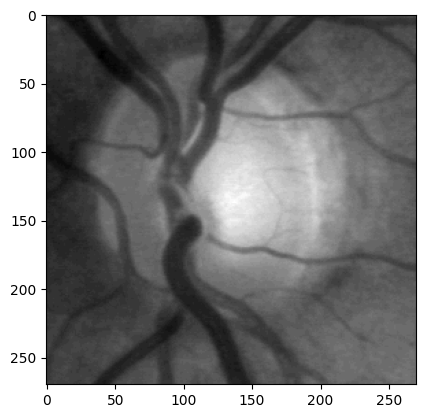

In [190]:
plt.imshow(luvroi[:,:,2], 'gray')

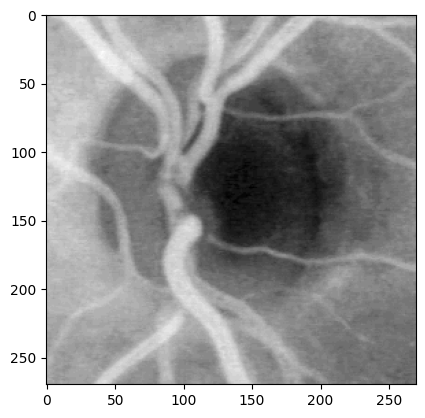

In [196]:
plt.imshow(crcbroi[:,:,2], 'gray')

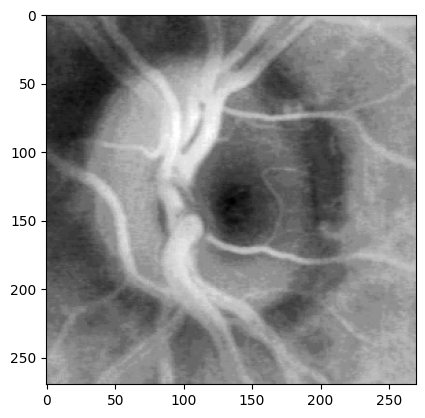

In [64]:
plt.imshow(yuvroi[:,:,2], 'gray')

# Proceeds to LUV

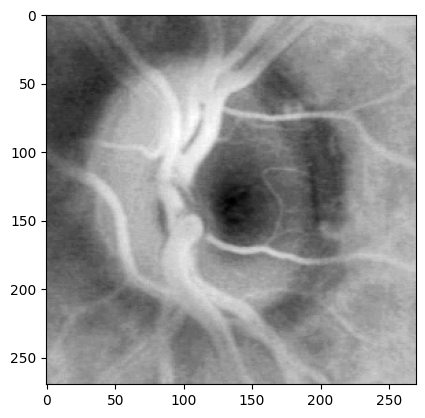

In [65]:
myluv = luvroi[:,:,1]
plt.imshow(myluv, 'gray')

In [66]:
clahe = cv2.createCLAHE(5.0, (8,8))
luvcl = clahe.apply(myluv.copy())

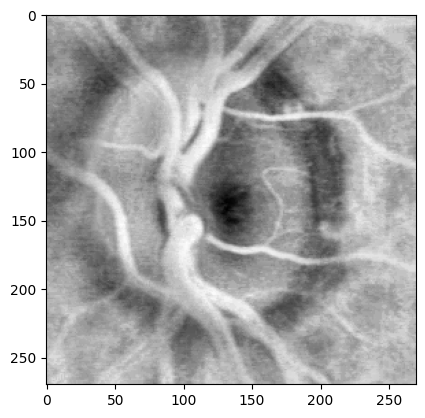

In [67]:
plt.imshow(luvcl, 'gray')

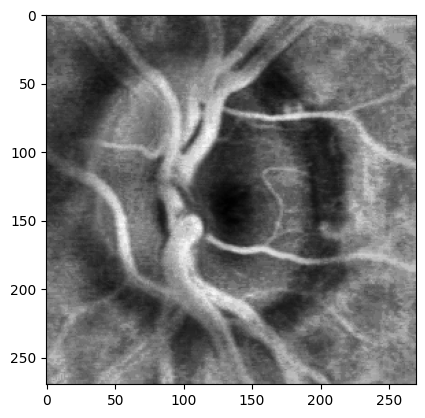

In [184]:
g_gamma = adjust_gamma(luvcl.copy(), 3.0)
plt.imshow(g_gamma, 'gray')

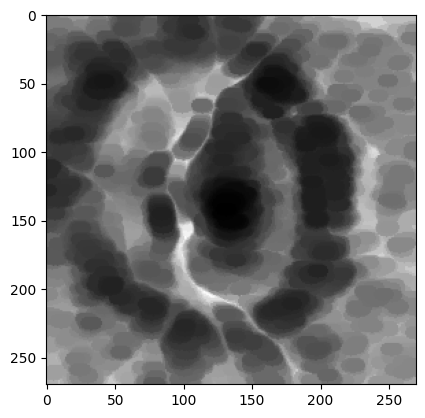

In [185]:
erokernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,10))
eroded = cv2.erode(g_gamma.copy(), erokernel, 1)
plt.imshow(eroded, 'gray')

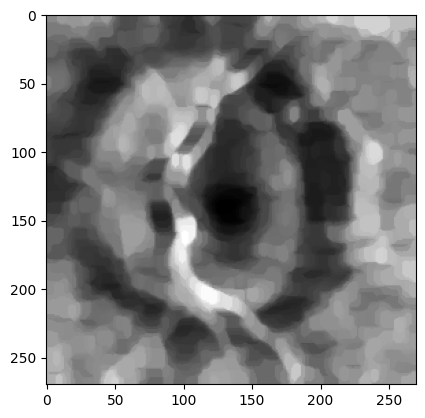

In [187]:
dilakernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,10))
dilated = cv2.dilate(eroded.copy(), dilakernel, 2)
plt.imshow(dilated, 'gray')

In [188]:
ret2,th2 = cv2.threshold(dilated.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

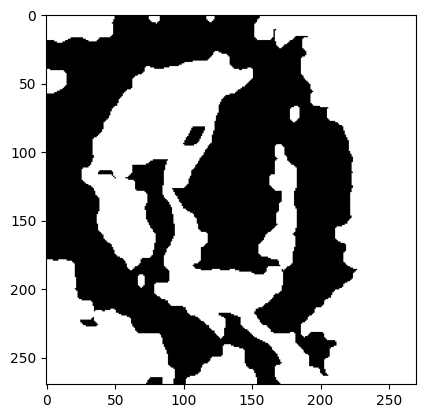

In [189]:
plt.imshow(th2, 'gray')